<a href="https://colab.research.google.com/github/chernoskutov1989dv/-Neural-network-cats_vs_dogs-prediction/blob/main/_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
train,_ = tfds.load("cats_vs_dogs", split = ["train[:100%]"], with_info= True, as_supervised =True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteE48BPT/cats_vs_dogs-train.tfrecord*...:   0%|    …

Dataset cats_vs_dogs downloaded and prepared to ~/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [ ]:
SIZE = (224,224)
def resize_image(img, label):
    img= tf.cast(img, tf.float32)
    img= tf.image.resize(img,SIZE)
    img/=255.0
    return img, label



In [ ]:
train_resized = train [0].map(resize_image)
train_batches = train_resized.shuffle(1000).batch(16)



In [ ]:
base_layers = tf.keras.applications.MobileNetV2(input_shape=(SIZE[0], SIZE[1], 3), include_top = False)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.Sequential([ 
                            base_layers,
                            GlobalAveragePooling2D(),
                            Dropout(0.2),
                            Dense(1)
])
model.compile(optimizer = "adam", loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics = ["accuracy"])


In [ ]:
model.fit(train_batches, epochs=1)

1454/1454 [==============================] - 2315s 2s/step - loss: 0.1601 - accuracy: 0.9332


In [ ]:

files.upload()

Saving 1.jpg to 1 (3).jpg
Saving 2.jpg to 2 (3).jpg
Saving 3.jpg to 3 (3).jpg
Saving 4.jpg to 4 (1).jpg
Saving 5.jpg to 5 (3).jpg
Saving 6.jpg to 6 (1).jpg
Saving 7.jpg to 7 (3).jpg
Saving 8.jpg to 8 (3).jpg


{'1.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe1\x00\xeeExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x05\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00J\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00R\x01(\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x02\x13\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00Z\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x01\x00\x00\x00\x01\x00\x00\x00\x01\x00\x05\x90\x00\x00\x07\x00\x00\x00\x040231\x91\x01\x00\x07\x00\x00\x00\x04\x01\x02\x03\x00\x92\x13\x00\x02\x00\x00\x00J\x00\x00\x00\x9c\xa0\x00\x00\x07\x00\x00\x00\x040100\xa0\x01\x00\x03\x00\x00\x00\x01\xff\xff\x00\x00\x00\x00\x00\x00Optimized by OptiPic.io at 2019-06-06 09:51:58 from 232703 to 93002 bytes\x00\xff\xfe\x00<CREATOR: gd-jpeg v1.0 (using IJG JPEG v62), quality = 100\n\xff\xdb\x00\x84\x00\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x03\x03\x02\x03\x03\x04\x03\x03\x03\x03\x04\x06\x04\x04\x04\x04\x04\x06\t\x05\x06\x05\x05\x06\x05\t\x08\t\x07

1/1 [==============================] - 0s 41ms/step


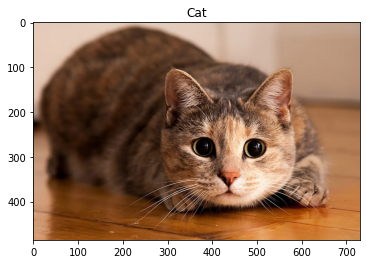

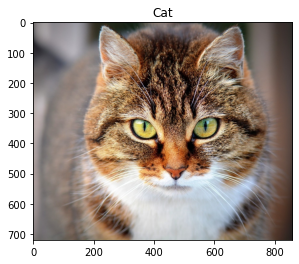

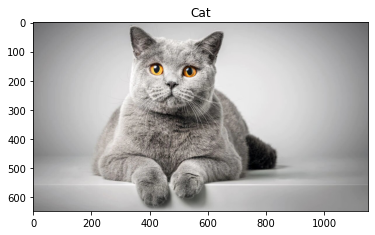

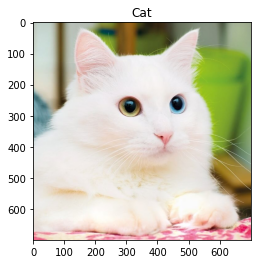

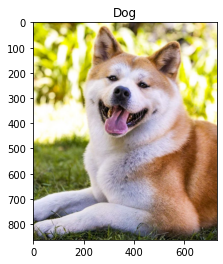

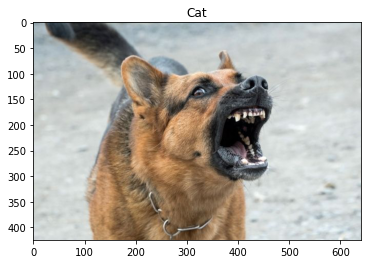

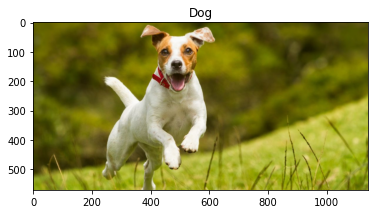

In [ ]:
images=["1.jpg" , "2.jpg",  "3.jpg", "4.jpg", "5.jpg", "6.jpg", "7.jpg"] #важно! если фото формата jpeg - то пишем "4.jpeg". Если не правильно прописать формат файла, то будет ошибка!
for i in images:

    img = load_img(i)
    img_array = img_to_array(img)
    img_resized, _ = resize_image (img_array,_)
    img_expended = np.expand_dims(img_resized, axis=0)
    prediction = model.predict(img_expended)
    plt.figure()
    plt.imshow(img)
    label = 'Dog' if prediction > 0 else 'Cat'
    plt.title("{}".format (label))   


